In [2]:
# Import numpy for matrix, scipy for ???, tinyarray for fast matrix processing.
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
# Define Pauli matrices
s_0 = np.identity(2)
s_z = np.array([[1, 0], [0, -1]])
s_x = np.array([[0, 1], [1, 0]])
s_y = np.array([[0, -1j], [1j, 0]])

tau_z = np.kron(s_z, s_0)
tau_x = np.kron(s_x, s_0) 
sigma_z = np.kron(s_0, s_z) 
tau_zsigma_x = np.kron(s_z, s_x)

# 定义一维BdG紧束缚模型
def BdG1d(L,H_onsite,H_hop):
    H_0 = np.eye(L,None,0)
    H_R  = np.eye(L,None,1) 
    H_L  = np.eye(L,None,-1)
    H_BdG = np.kron(H_0, H_onsite) + np.kron(H_R, H_hop) + np.kron(H_L, np.transpose(np.conj(H_hop)))
    return H_BdG

#定义Majorana表象下的紧束缚模型
def Majorana1d(L,H_onsite,H_hop):
    H_0 = np.eye(L,None,0)
    H_R  = np.eye(L,None,1) 
    H_L  = np.eye(L,None,-1)
    H_Mf = np.kron(H_0, H_onsite) + np.kron(H_R, H_hop) - np.kron(H_L, np.transpose(H_hop))
    return H_Mf

# Calculating the spectrum in the BdG Formalism

The following python routine is to calculate the BdG Hamiltonian,

\begin{eqnarray}
H =&& - t \sum_{\langle i,j \rangle ,\sigma}{ c^\dagger_{i\sigma}c_{j\sigma}} - (\mu + eV)\sum_{i,\sigma}{c^\dagger_{i\sigma}c_{i\sigma}}+ \frac{\eta}{2} \sum_{i,\sigma,\sigma'} c^\dagger_{i + 1,\sigma}(i\tau_y)_{\sigma \sigma'}c_{i,\sigma'} \\\nonumber
&&+ \sum_{i,\sigma}{c^\dagger_{i,\sigma} (M_x\tau_x )_{\sigma \sigma'}c_{i,\sigma'}}+ \sum_{i}{\Delta c^\dagger_{i,\uparrow} c^\dagger_{i,\downarrow}  + h.c.}\\\nonumber
\end{eqnarray}

The matrix form of this Hamiltonian is,

\begin{eqnarray}
\tilde {{H}} =\left(\begin{array}{ccccccc}
\cdot&\cdot&\cdot&\cdot&\cdot&\cdot&\cdot\\%1
\cdot& {\mathcal{H}}_0& {\mathcal{H}}_1&0& 0&0& \cdot\\
\cdot& {\mathcal{H}}^{*}_1 & {\mathcal{H}}_0&{\mathcal{H}}_1& 0&0& \cdot\\
\cdot& 0 & {\mathcal{H}}^*_1& {\mathcal{H}}_0& {\mathcal{H}}_1&0& \cdot\\
\cdot& 0 & 0& {\mathcal{H}}^*_1& {\mathcal{H}}_0&{\mathcal{H}}_1& \cdot\\
\cdot& 0 & 0&0& {\mathcal{H}}^*_1&{\mathcal{H}}_0& \cdot\\
\cdot&\cdot&\cdot&\cdot&\cdot&\cdot&\cdot\\
\end{array}\right),\nonumber\\
\end{eqnarray}

with the on-site and nearest-neighbough matrix,

\begin{eqnarray}
\mathcal{H}_0 =  
\begin{pmatrix}
\tilde c^\dagger \& \tilde c_\uparrow & c_\uparrow & c^\dagger_\uparrow & c_\downarrow & c^\dagger_\downarrow \\
c^\dagger_\uparrow     &  -\mu - eV & 0 & M_x & \Delta\\
c_\uparrow             &  0& \mu +eV & -\Delta^* & -M_x\\
c^\dagger_\downarrow   &  M_x & -\Delta & -\mu-eV & 0\\
c_\downarrow           & \Delta^*& -M_x &0& \mu+eV  \\
\end{pmatrix},
\mathcal{H}_1 =  \left(\begin{array}{cccc}
 -t & 0 &\eta/2& 0\\
 0 & t& 0 &-\eta/2\\
-\eta/2& 0 & -t & 0  \\
0&\eta/2& 0&t\\
   \end{array}\right).
\end{eqnarray}


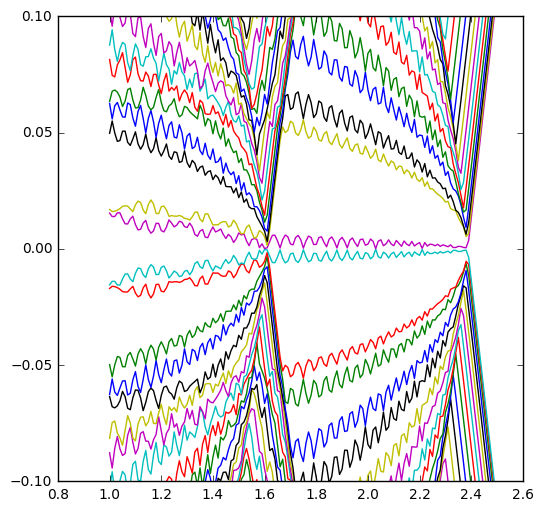

In [7]:

##计算Kitaev模型！！！BdG表象！

t = 1
delta = 0.1
eta = 0.2
M_x = 0.4
L = 100



#定义横轴及纵轴
mus = np.arange(1, 2.5, 0.01)
band = np.zeros(shape=(mus.shape[0],4*L))

#计算能谱
for mu in mus:
    H_onsite = np.array([[-mu, 0, M_x, delta], [0, mu, -np.conj(delta), -M_x], [ M_x, -delta, -mu, 0],[np.conj(delta), -M_x, 0, mu] ])  
    H_hop = np.array([[-t,0,eta/2,0], [0,t, 0, - eta/2], [-eta/2, 0, -t,0],[0,eta/2, 0, t] ]) 
    H_BdG = BdG1d(L, H_onsite, H_hop,)
    eigenval, eigenvec = np.linalg.eig(H_BdG)
    idx = eigenval.argsort()
    eigenval = eigenval[idx]
    eigenvec = eigenvec[:,idx]
    band[np.argwhere(mus == mu),:] = eigenval[:]
band = np.transpose(band)
#print(H_hop)

#画图
plt.figure(figsize=(6,6))
for nband in np.arange(0,4*L-1,1):
    plt.plot(mus,band[nband,:]) # use pylab to plot mus and band 
plt.ylim(-0.1, 0.1)
plt.show()# show the plot on the screen





# Calculation the Spectrum within Majorana representaion.
We are solveing the following Hamiltonian:
\begin{eqnarray}
H=  \frac{-it}{2}  \sum_{ i ,\sigma} [ \gamma_{i,\sigma,B} \gamma_{i+1,\sigma,A} - \gamma_{i,\sigma,A} \gamma_{i+1,\sigma,B}]
+   \frac{i(\mu + eV)}{2}  \sum_{i,\sigma}    \gamma_{i,\sigma,A} \gamma_{i,\sigma,B}\\
+ \frac{-i \eta}{4} \sum_{i,\sigma,\sigma'} [\gamma_{i ,\sigma,B}(i\sigma_y)_{\sigma \sigma'}\gamma_{i+1,\sigma',A} - \gamma_{i ,\sigma,A}(i\sigma_y)_{\sigma \sigma'}\gamma_{i+1,\sigma',B}] \\
+ \sum_{i,\sigma}  {\gamma_{i,\sigma,A} (iM_x\sigma_x /2  )_{\sigma \sigma'}\gamma_{i,\sigma',B}}+ \frac{-i\Delta}{2}  \sum_{i} [\gamma_{i,\uparrow,B} \gamma_{i,\downarrow,A} +  \gamma_{i,\uparrow,A} \gamma_{i,\downarrow,B}].
\end{eqnarray}
The matrix form of this Hamiltonian is,
\begin{eqnarray}
\tilde {{H}} =\frac{1}{4} \left(\begin{array}{ccccccc}
\cdot&\cdot&\cdot&\cdot&\cdot&\cdot&\cdot\\%1
\cdot& {\mathcal{H}}_0& {\mathcal{H}}_1&0& 0&0& \cdot\\
\cdot&- {\mathcal{H}}_1 & {\mathcal{H}}_0&{\mathcal{H}}_1& 0&0& \cdot\\
\cdot& 0 & -{\mathcal{H}}_1& {\mathcal{H}}_0& {\mathcal{H}}_1&0& \cdot\\
\cdot& 0 & 0& -{\mathcal{H}}_1& {\mathcal{H}}_0&{\mathcal{H}}_1& \cdot\\
\cdot& 0 & 0&0& -{\mathcal{H}}_1&{\mathcal{H}}_0& \cdot\\
\cdot&\cdot&\cdot&\cdot&\cdot&\cdot&\cdot\\
\end{array}\right),\nonumber\\
\end{eqnarray}
with the on-site and nearest-neighbough matrix,
\begin{eqnarray}
\mathcal{H}_0 =  \left(\begin{array}{cccc}
 0& \mu &0& M_x - \Delta\\
 -\mu & 0& -M_x - \Delta &0\\
0&M_x +\Delta& 0 & \mu  \\
-M_x +\Delta&0& -\mu&0\\
   \end{array}\right),
\mathcal{H}_1 =  \left(\begin{array}{cccc}
 0& t &0& \eta/2\\
 -t & 0& -\eta/2 &0\\
0&-\eta/2& 0 & t  \\
\eta/2&0& -t&0\\
   \end{array}\right).
\end{eqnarray}

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


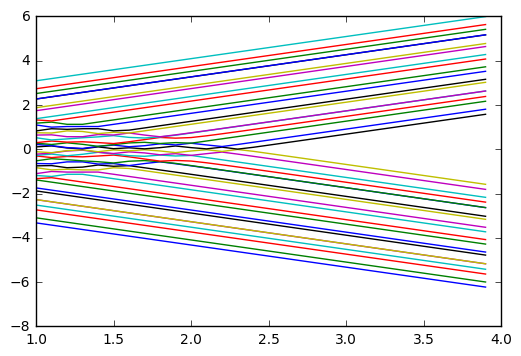

In [6]:
##计算Kitaev模型！！！Majorana表象！
t = 1
delta = 0.1
eta = 0.2
M_x = 0.4
L = 10



#定义横轴及纵轴
mus = np.arange(1, 4, 0.1)
band = np.zeros(shape=(mus.shape[0],4*L))

#计算能谱
for mu in mus:
    H_onsite = np.array([[0, mu, 0, M_x - delta], [-mu, 0, - M_x - delta, 0], [0, M_x + delta, 0, mu],[-M_x + delta, 0, -mu, 0] ])  
    H_hop = np.array([[0, t, 0, eta/2], [-t, 0, - eta/2 , 0], [0, -eta/2, 0, t],[eta/2, 0, -t, 0] ])  
    H_Mf = 1j*Majorana1d(L, H_onsite, H_hop,)
    eigenval, eigenvec = np.linalg.eig(H_Mf)
    idx = eigenval.argsort()
    eigenval = eigenval[idx]
    eigenvec = eigenvec[:,idx]
    band[np.argwhere(mus == mu),:] = eigenval[:]
band = np.transpose(band)
#print(H_onsite)
#print(H_hop)
#print(H_Mf)
#=print(eigenval)



#画图
for nband in np.arange(0,4*L-1,1):
    plt.plot(mus,band[nband,:]) # use pylab to plot mus and band   
plt.show()# show the plot on the screen

